In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler , LabelEncoder
from sklearn.metrics         import r2_score , accuracy_score , mean_squared_error
from sklearn.neighbors       import KNeighborsClassifier 
from sklearn.linear_model    import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [128]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Dealing with unnecessary data

In [130]:
df = df.drop(columns = ['Unnamed: 32' , 'id'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Label encoding Diagnosis**

In [131]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Assigning X and Y trains 

In [132]:
x = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

In [133]:
y = y.values.reshape(-1,1)
print(y.shape)
x.shape

(569, 1)


(569, 30)

# Scaling

In [134]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

**Split**

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [136]:
model = Sequential([
    Dense(10,activation = 'relu' , input_dim = 30 ) ,
    Dense(15,activation = 'relu'  ) ,
    Dense(1, activation = 'sigmoid'  )
   
])
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

# Tracing Losses

In [138]:
history = model.fit(x_train,y_train, epochs = 125 , validation_split = 0.2 )

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2515 - val_loss: 0.2468
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2459 - val_loss: 0.2396
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2350 - val_loss: 0.2298
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2279 - val_loss: 0.2201
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2187 - val_loss: 0.2094
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2066 - val_loss: 0.1983
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1947 - val_loss: 0.1871
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1847 - val_loss: 0.1757
Epoch 9/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1722 - val_loss: 0.1645
Epoch 10/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1601 - val_loss: 0.1538
Epoch 11/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1471 - val_loss: 0.1434
Epoch 12/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [139]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']

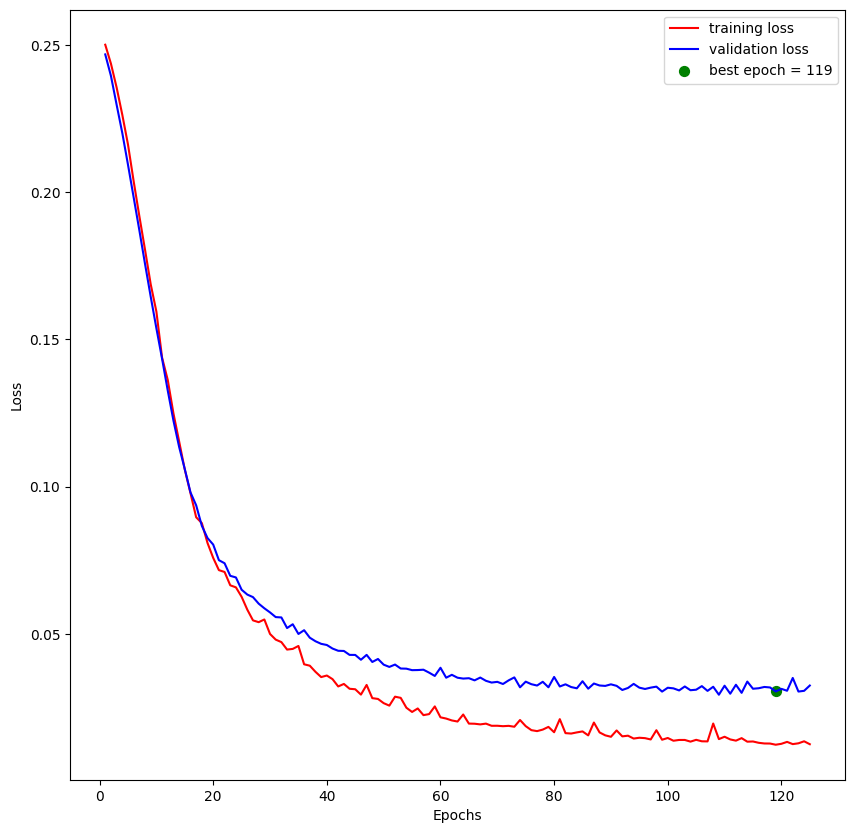

In [140]:
index_loss = np.argmin(tr_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label=f"best epoch = {index_loss+1}"

plt.figure(figsize = (10,10))
plt.plot(Epochs , tr_loss , color = 'r' , label = 'training loss')
plt.plot(Epochs , val_loss , color = 'b' , label = 'validation loss')

plt.scatter(index_loss + 1 , val_lowest,c='green',s=50,label=loss_label)

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Testing the model (Logistic Regression)

In [141]:
Class_model = LogisticRegression()
Class_model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [149]:
y_hat = Class_model.predict(x_test)

mean_squared_error(y_test , y_hat)

0.017543859649122806

In [150]:
accuracy_score(y_test, y_hat)

0.9824561403508771

# Testing the model (KNN)

In [144]:
model_KNN = KNeighborsClassifier(n_neighbors = 2)

In [145]:
model_KNN.fit(x_train , y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [152]:
y_hat = model_KNN.predict(x_test)

In [153]:
mean_squared_error(y_test , y_hat)

0.02631578947368421

In [154]:
accuracy_score(y_test, y_hat)

0.9736842105263158